In [11]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image


In [12]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [13]:
X_train.shape

(60000, 28, 28)

In [14]:
X_test.shape

(10000, 28, 28)

In [15]:
single_image= X_train[0]

In [16]:
single_image.shape

(28, 28)

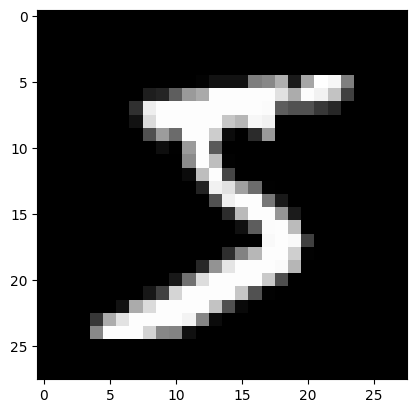

In [17]:
plt.imshow(single_image,cmap='gray')

In [18]:
y_train.shape

(60000,)

In [20]:
X_train.min()

0

In [22]:
X_train.max()

255

In [23]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [25]:
X_train_scaled.min()

0.0

In [26]:
X_train_scaled.max()

1.0

In [27]:
y_train[0]

5

In [28]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [29]:
type(y_train_onehot)

numpy.ndarray

In [30]:
y_train_onehot.shape

(60000, 10)

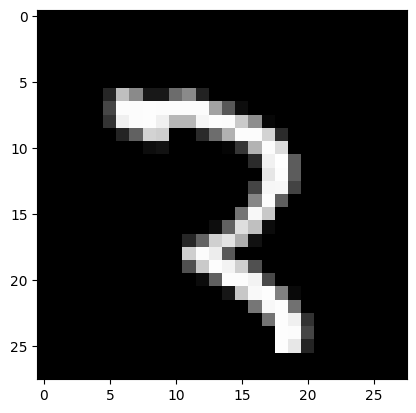

In [31]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [32]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [33]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [34]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)

In [43]:
X_train_flat = X_train_scaled.reshape(X_train_scaled.shape[0], -1)
X_test_flat = X_test_scaled.reshape(X_test_scaled.shape[0], -1)

In [44]:
mlp.fit(X_train_flat, y_train_onehot)

MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)

In [45]:
y_pred = mlp.predict(X_test_flat)

In [53]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score,f1_score
precision = precision_score(y_test_onehot, y_pred, average='macro', zero_division=1)
f1 = f1_score(y_test_onehot, y_pred, average='macro', zero_division=1)


In [54]:
print(f1)

0.9772209166410833


In [55]:
print(precision)

0.978986617126697


In [56]:
img = image.load_img('imagefive.jpeg')

In [57]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [58]:
img = image.load_img('imagefive.jpeg')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [60]:
# Flatten the input image
img_flat = img_28_gray_scaled.reshape(1, -1)

# Predict using the flattened input
x_single_prediction = np.argmax(mlp.predict(img_flat), axis=1)

In [61]:
print(x_single_prediction)

[3]


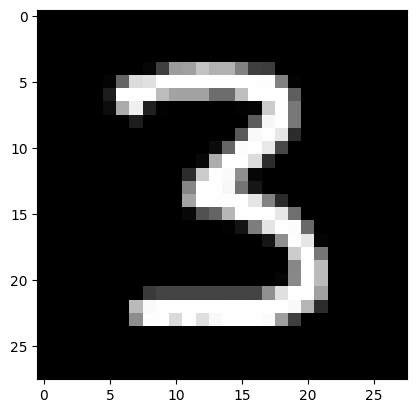

In [62]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')


img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0